<a href="https://colab.research.google.com/github/kkimhaji/FlyAI/blob/main/Deep%20Learning/CNN/20_1_yolov5_custom(personal_training).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -L "https://public.roboflow.com/ds/O1Og4zSXRh?key=gNIjoa8CUB" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   902  100   902    0     0    767      0  0:00:01  0:00:01 --:--:--   767
100 16.8M  100 16.8M    0     0  11.0M      0  0:00:01  0:00:01 --:--:-- 11.0M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/0b47311f426ff926578c9d738d683e76_jpg.rf.40183eae584a653181bbd795ba3c353f.jpg  
 extracting: test/images/1c0060ef868bdc326ce5e6389cb6732f_jpg.rf.f02cd668d26a53d9bf001497992b3657.jpg  
 extracting: test/images/2f6fb003bb89cd401322a535acb42f65_jpg.rf.66c0a46773a9cd583fb96c3df41a9e0c.jpg  
 extracting: test/images/410993714e325a1de3e394ffe860df3a_jpg.rf.657c49ca295ef54da23469189070a075.jpg  
 extracting: test/images/4e3117459d759798537eb52cf5bf534d_jpg.rf.ec961b62d4b0e131fae76

In [2]:
%cd /content

/content


In [3]:
!git clone https://github.com/ultralytics/yolov5.git


Cloning into 'yolov5'...
remote: Enumerating objects: 14944, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 14944 (delta 2), reused 1 (delta 0), pack-reused 14936
Receiving objects: 100% (14944/14944), 13.99 MiB | 9.37 MiB/s, done.
Resolving deltas: 100% (10269/10269), done.


In [4]:
%cd /content/yolov5

/content/yolov5


In [ ]:
!pip install -r requirements.txt

In [6]:
%cd /

/


In [10]:
from glob import glob

train_img = glob('/content/dataset/train/images/*.jpg')
val_img = glob('/content/dataset/valid/images/*.jpg')
len(train_img), len(val_img)

(606, 58)

In [27]:
test_img = glob('/content/dataset/test/images/*.jpg')

In [11]:
# 텍스트 파일로 저장 (파일 path) - 학습시킬 때 path를 읽어서 사용 
with open('/content/dataset/train.txt', 'w') as f:
  f.write('\n'.join(train_img) + '\n')

with open('/content/dataset/val.txt', 'w') as f:
  f.write('\n'.join(val_img) + '\n')

In [12]:
# yaml 수정
import yaml

with open('/content/dataset/data.yaml', 'r') as f:
  data = yaml.load(f, Loader = yaml.FullLoader)

data['train'] = '/content/dataset/train.txt'
data['val'] = '/content/dataset/val.txt'

with open('/content/dataset/data.yaml', 'w') as f:
  yaml.dump(data, f)

In [13]:
%cd /content/yolov5

/content/yolov5


In [ ]:
!python train.py --img 416 --batch 16 --epochs 50 --data /content/dataset/data.yaml --cfg ./models/yolov5s.yaml --weight yolov5s.pt --name chess_yolov5

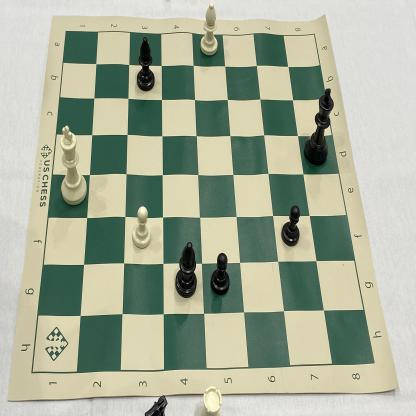

In [25]:
from IPython.display import Image
import os

val_img_path = val_img[20]
Image(val_img_path)

29


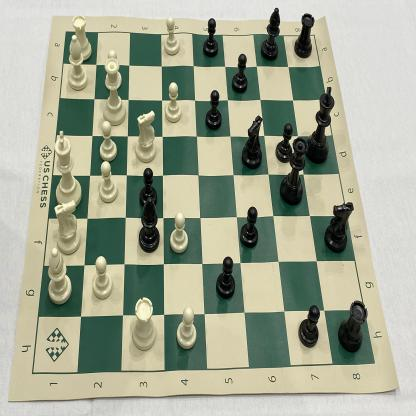

In [30]:
test_img_path = test_img[2]
print(len(test_img))
Image(test_img_path)

In [18]:
%cd /content/yolov5

/content/yolov5


In [26]:
!python detect.py --weights /content/yolov5/runs/train/raccoon_yolov5s/weights/best.pt --save-txt --img 416 --conf 0.5 --source '{val_img_path}'

detect: weights=['/content/yolov5/runs/train/raccoon_yolov5s/weights/best.pt'], source=/content/dataset/valid/images/1be2a621f309c7482e9a79ad5b23ecbe_jpg.rf.e4117f6396582d8058dbd15974e30b04.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-61-gcaba2ae Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7045186 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 /content/dataset/valid/images/1be2a621f309c7482e9a79ad5b23ecbe_jpg.rf.e4117f6396582d8058dbd15974e30b04.jpg: 416x416 2 black-bishops, 1 black-king, 2 black-pawns, 1 white-bishop, 1 white-king, 1 white-pawn, 8.2ms
Speed: 0.4

In [31]:
!python detect.py --weights /content/yolov5/runs/train/raccoon_yolov5s/weights/best.pt --save-txt --img 416 --conf 0.5 --source '{test_img_path}'

detect: weights=['/content/yolov5/runs/train/raccoon_yolov5s/weights/best.pt'], source=/content/dataset/test/images/8ff752f9ed443e6e49d495abfceb2032_jpg.rf.530a6c314a4848ead2b0ebc40e6ba651.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-61-gcaba2ae Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7045186 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 /content/dataset/test/images/8ff752f9ed443e6e49d495abfceb2032_jpg.rf.530a6c314a4848ead2b0ebc40e6ba651.jpg: 416x416 2 black-bishops, 1 black-king, 2 black-knights, 8 black-pawns, 2 black-rooks, 2 white-bishops, 2 white-kings